У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data_path = '../../data/yulu_rental.csv'
df = pd.read_csv(data_path)

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [9]:
sns.set_theme()

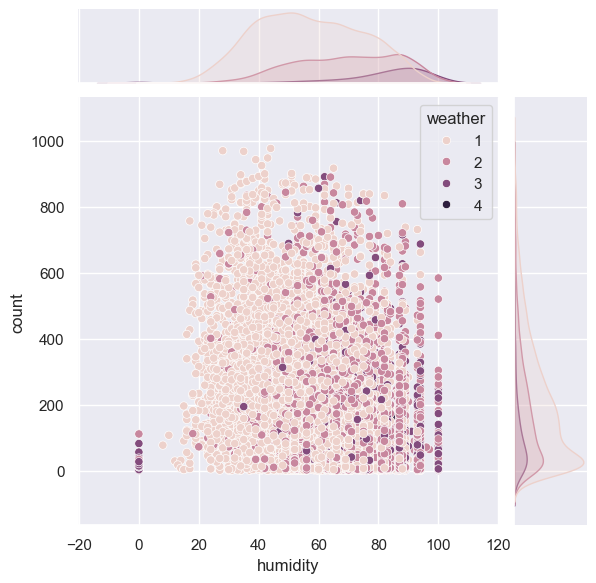

In [13]:
sns.jointplot(data=df, x='humidity', y='count', hue='weather');

**There are a lot of points, so it's hard to find some dependencies, but in general I could make the following conclusions:**
- *Weather 1, with the greatest weather conditions, usually has humidity between 20 and 60, the rest of the weather types 2-4 have higher humidity 60-100.*
- *Looking at the part of the grapth between humidity 20 and 40, there are mostly the same weather type 1, but the amount of rents of bycicles differinciate from 0 to 1000. It could mean that the weather condition can influence the amount of rents per day, but it is not the only factor and it will be useful to find the other decisive factor.*

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [42]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [32]:
df_spring_summer = df[(df.season==1) | (df.season==2)]

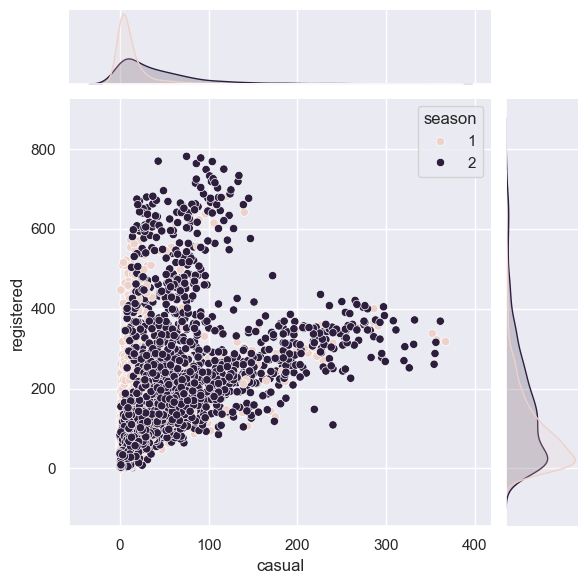

In [100]:
grapth_1 = sns.jointplot(data=df_spring_summer, x='casual', y='registered', hue='season', kind='scatter', marginal_kws=dict(alpha=0.2));

**Conclusions:**

- *The graph shows that there is some positive correlation between the registered users and the casual users, but only in some cases, in other cases there is no correlation at all. So it is crutial to find an additional factor in which cases we have a positive correlation between the registered users and the casual users.*
- *Because the points from both seasons 1 and 2 cover each other, it is not quite clear if there is a difference in the correlation between the seasons, but I think because they cover each other in the same directions, they have the same tendency.*

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


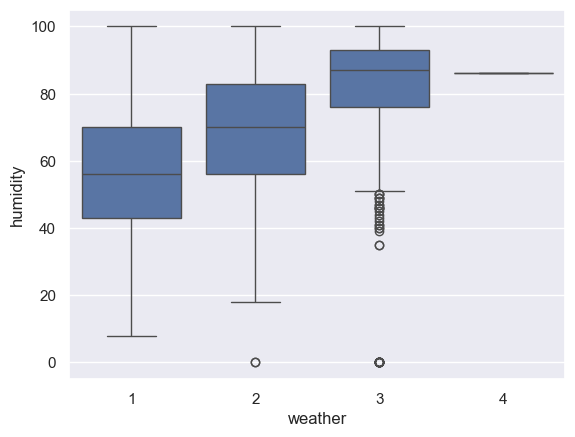

In [78]:
sns.boxplot(data=df, x='weather', y='humidity');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [84]:
df_filtr_pairplot.head()

,workingday,casual,registered,count
0,0,3,13,16
1,0,8,32,40
2,0,5,27,32
3,0,3,10,13
4,0,0,1,1


In [82]:
df_filtr_pairplot = df[['workingday', 'casual', 'registered', 'count']]

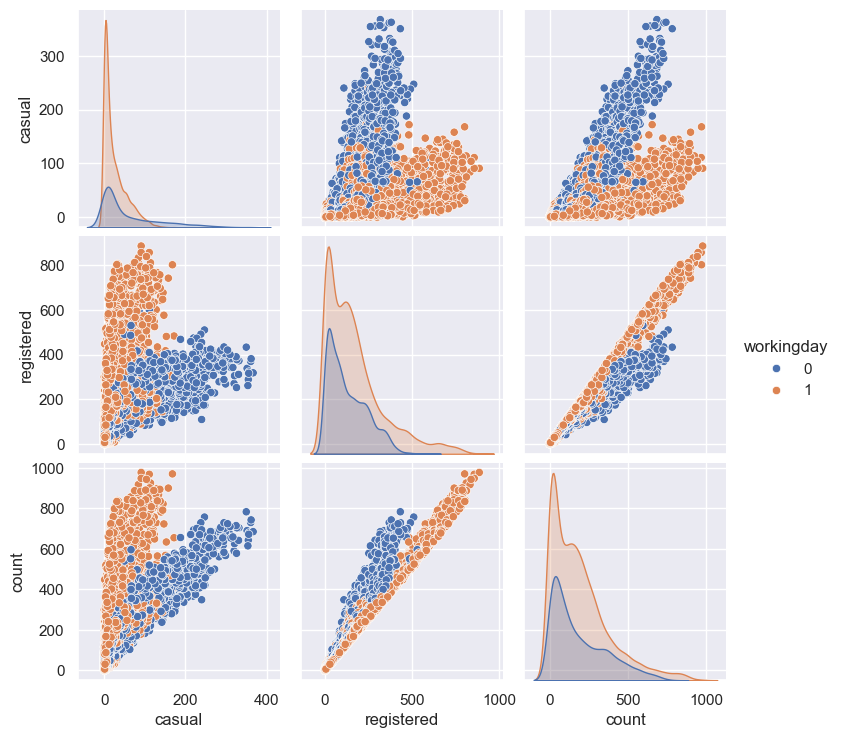

In [86]:
sns.pairplot(data=df_filtr_pairplot, hue='workingday');  # all grapths

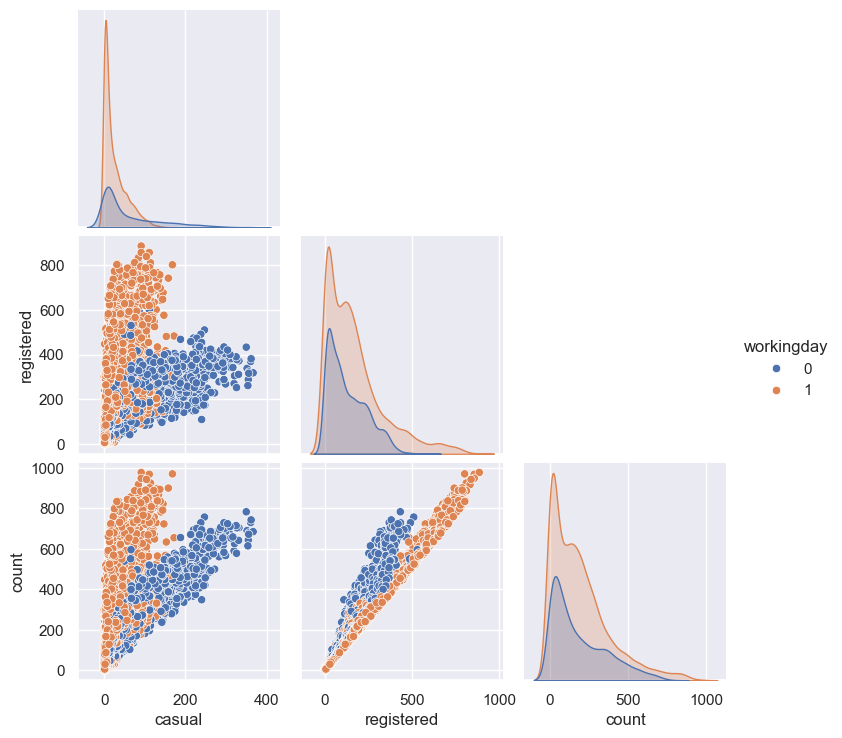

In [98]:
sns.pairplot(data=df_filtr_pairplot, hue='workingday', corner=True);  # Lower triangle graphics only

**Conclusions:**
- *The first graph shows the correlation between the registered users and casual users. There is a strong positive correlation during weekends and holidays, but no correlation during working days*
- *The second graph shows the correlation between the count of rentals and casual users. This is the same scenario as in the first case. There is a strong positive correlation during weekends and holidays, but no correlation during working days.*
- *The last graph shows the correlation between the count of rentals and the number of registered users. There is the same strong positive correlation for weekends and working days*.*
- *After summarising all three graphs I could say that registered users are users that use bisycle maybe to go to the work. The number of registered users has a strong correlation  with the total number of users. Casual users rent a bike mainly on weekends or holidays. They only have a positive correlation on these days.*

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [164]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01


In [166]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [168]:
df['date'] = df.datetime.dt.date

In [178]:
df_viz = df[['date', 'registered', 'casual']].groupby('date').sum()

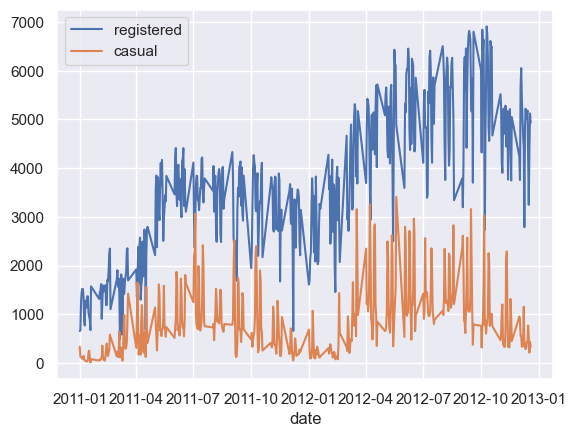

In [186]:
df_viz.plot();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)


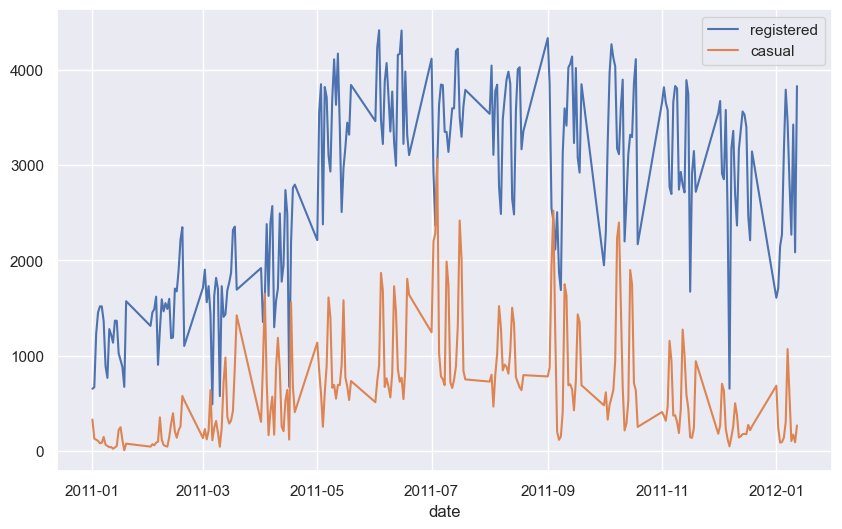

In [212]:
df_viz[:240].plot(figsize=(10,6)); #dynamic for one year